In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path

['/home/blessyantony/miniconda3/envs/zoonosis/lib/python311.zip',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/lib-dynload',
 '',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/coronaviridae/../../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/coronaviridae/../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/coronaviridae/../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/coronaviridae/../..']

In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

from src.utils import utils, evaluation_utils, visualization_utils
from sklearn.metrics import auc, precision_recall_curve
from statistics import mean
from datetime import datetime

In [3]:
# file_paths = {
#     "msl128vs30_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240824/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl128vs30_s64/tl_tf_multi_sarscov2_variants_s.csv"),
#     "msl128vs30cls_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240825/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl128vs30cls_s64/tl_tf_multi_sarscov2_variants_s.csv"),
#     "msl256vs30_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240808/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl256vs30_s64/tl_tf_multi_sarscov2_variants_s.csv"),
#     "msl256vs30cls_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240808/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl256vs30cls_s64/tl_tf_multi_sarscov2_variants_s.csv")
# }
id_col = "accession_id"
file_paths = {
    #"msl128vs30_ae_bn_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240829/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl128ae_bn_vs30_s64/tl_tf_multi_sarscov2_variants_s.csv"),
    #"msl128vs30cls_ae_bn_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240829/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl128ae_bn_vs30cls_s64/tl_tf_multi_sarscov2_variants_s.csv"),
    #"ProtienBert": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_uniprot_embl_vertebrates_t0.01_c8/20240902/host_multi/proteinbert/uniprot_cov_s_prot_embl_hosts/sarscov2_variants_s_prediction_results_20240902_224534.csv"),
    "ProtT5": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/sarscov2_s_prot_variants/20250201/uniref90/external/prot_t5_xl_uniref50_lr3e-4.csv"),
    "ProstT5": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/sarscov2_s_prot_variants/20250201/uniref90/external/prostt5_lr3e-4.csv"),
    #"ESM2-35M": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/sarscov2_s_prot_variants/20250123/uniref90/external/esm2_t12_35M_UR50D_lr1e-4.csv"),
    #"ESM2-650M": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/sarscov2_s_prot_variants/20250123/uniref90/external/esm2_t33_650M_UR50D_lr1e-4.csv"),
    #"ESM2-3B": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/sarscov2_s_prot_variants/20250123/uniref90/external/esm2_t36_3B_UR50D_lr1e-4.csv"),
    #"ESM3": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/sarscov2_s_prot_variants/20250123/uniref90/external/esm3_lr1e-4.csv"),
    #"ProtienBert-2048": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_uniprot_embl_vertebrates_t0.01_c8/20240902/host_multi/proteinbert/uniprot_cov_s_prot_embl_hosts/sarscov2_variants_s_prediction_results_20240903_132845.csv"),
    #"VirProBert-msl1366": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240903/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_msl1366/tl_tf_multi_sarscov2_variants_s.csv"),
    #"Hybd-sl256s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_perturbation/20240829/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl256ae_bn_vs30_s64/tl_tf_multi_sarscov2_variants_s.csv"),
    #"Hybd-sl256s64_CLS_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240829/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl256ae_bn_vs30cls_s64/tl_tf_multi_sarscov2_variants_s.csv"),
    "HAVEN": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/sarscov2_s_prot_variants/20250123/uniref90/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl256ae_bn_vs30cls_s64.csv")
}

In [4]:
dfs = []
for k, v in file_paths.items():
    df = pd.read_csv(v)
    df["model"] = k
    index_seq_pred = df[df[id_col] == "YP_009724390.1"]["Human"].values[0]
    df["Human_pred_diff"] = df["Human"] - index_seq_pred
    dfs.append(df)
df = pd.concat(dfs)
df

,accession_id,Cat,Chicken,Chinese rufous horseshoe bat,Ferret,Gray wolf,Horshoe bat,Human,Pig,y_true,pangolin_lineage,geo_location,seq_length,model,Human_pred_diff
0,UDW43218.1,0.006330,1.050447e-02,0.006680,0.032874,0.005100,0.019163,0.909526,0.009823,Human,C.37,USA: Texas,1266,ProtT5,0.877108
1,UJZ71565.1,0.008074,2.483119e-07,0.000002,0.911808,0.033276,0.006743,0.028032,0.012065,Human,B.1.1.529,USA,1273,ProtT5,-0.004386
2,UES70215.1,0.003342,1.227013e-03,0.795080,0.015439,0.004009,0.139110,0.039315,0.002477,Human,B.1.526,USA,1273,ProtT5,0.006897
3,QSE06394.1,0.003247,1.127909e-03,0.806335,0.014812,0.003732,0.130946,0.037447,0.002354,Human,P.2,USA: California,1273,ProtT5,0.005029
4,QTN76737.1,0.003458,1.174976e-03,0.801658,0.015148,0.003921,0.133582,0.038618,0.002440,Human,P.2,USA: New Jersey,1273,ProtT5,0.006200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,QVL01758.1,0.040101,4.819087e-06,0.614859,0.024371,0.003751,0.032906,0.273032,0.010976,Human,B.1.1.7,USA: Michigan,1270,VirProBERT,-0.468530
1522,QVG32451.1,0.024636,5.279566e-06,0.142835,0.015277,0.003411,0.029747,0.768989,0.015099,Human,B.1.617.1,USA: Illinois,1273,VirProBERT,0.027428
1523,UIT75201.1,0.008459,1.363562e-06,0.070926,0.010776,0.001566,0.009238,0.889716,0.009317,Human,B.1.427,USA,1273,VirProBERT,0.148155
1524,UGW14958.1,0.021574,8.265451e-06,0.166947,0.015973,0.003626,0.032665,0.739008,0.020199,Human,B.1.427,USA,1273,VirProBERT,-0.002553


##### Process ESM3 separately because it was executed using the pertubation analysis pipeline and not the sarscov2 variant pipeline.

In [5]:
esm3_df = pd.read_csv(os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/sarscov2_s_prot_variants/20250123/uniref90/external/esm3_lr1e-4.csv"))
esm3_df["model"] = "ESM3"
esm3_df

,Cat,Chicken,Chinese rufous horseshoe bat,Ferret,Gray wolf,Horshoe bat,Human,Pig,accession_id,y_true,model
0,0.013420,0.000370,0.246287,0.021458,0.009859,0.079028,0.613571,0.016007,QUR40592.1,Human,ESM3
1,0.002790,0.000780,0.748513,0.008765,0.003287,0.196386,0.029051,0.010427,UCK71595.1,Human,ESM3
2,0.002410,0.000846,0.748511,0.007380,0.003473,0.199265,0.028266,0.009849,UEA15086.1,Human,ESM3
3,0.015028,0.000223,0.074244,0.022930,0.016191,0.053944,0.808746,0.008695,QVN41227.1,Human,ESM3
4,0.002948,0.000823,0.706261,0.009218,0.003386,0.236314,0.029563,0.011487,QYZ52400.1,Human,ESM3
...,...,...,...,...,...,...,...,...,...,...,...
1521,0.033002,0.003407,0.076918,0.020166,0.010857,0.016620,0.824890,0.014139,QUI11057.1,Human,ESM3
1522,0.002282,0.000688,0.766168,0.007731,0.002871,0.182816,0.027462,0.009982,QVE76837.1,Human,ESM3
1523,0.002649,0.000806,0.774727,0.008059,0.003375,0.171108,0.028715,0.010560,QTS06228.1,Human,ESM3
1524,0.008682,0.000308,0.506420,0.020655,0.019005,0.082999,0.341344,0.020586,UIT31286.1,Human,ESM3


In [6]:
# get the mapping between accession ids and the pangolin lineage
accession_id_pangolin_lineage_map = df[df["model"] == "HAVEN"][["accession_id", "pangolin_lineage"]].set_index("accession_id").to_dict()["pangolin_lineage"]
accession_id_pangolin_lineage_map

{'UDK53098.1': 'B',
 'QVK76058.1': 'B.1.526',
 'URA56840.1': 'P.1',
 'UQM96776.1': 'BA.1',
 'QUA30248.1': 'B.1.525',
 'QZK79290.1': 'B.1.351',
 'QVD98248.1': 'B.1.617.1',
 'QVD69993.1': 'B.1.429',
 'QTW74521.1': 'B.1.525',
 'UEL67414.1': 'B.1.621',
 'QVF96340.1': 'B.1.351',
 'WFH55996.1': 'BA.1',
 'UBO11583.1': 'B.1.351',
 'QTK18242.1': 'P.2',
 'WBO26260.1': 'B.1.617.1',
 'URA68735.1': 'P.1',
 'UBA51659.1': 'B.1.617.2',
 'QWO25606.1': 'P.3',
 'QUQ12133.1': 'C.37',
 'QVJ23267.1': 'P.2',
 'UJE57960.1': 'BA.1',
 'QTC70831.1': 'B.1.429',
 'ULL32145.1': 'B.1.351',
 'UFR25064.1': 'B.1.1.7',
 'QWX81175.1': 'B.1.429',
 'QSM31389.1': 'B.1.427',
 'QVO64483.1': 'B.1.1.7',
 'QWA59502.1': 'B.1.1.7',
 'QTD26339.1': 'P.2',
 'QVE77712.1': 'B.1.617.1',
 'UJI25917.1': 'B.1.1.529',
 'QTY51616.1': 'B.1.351',
 'UGN57134.1': 'B.1.617.2',
 'QTM57140.1': 'B.1.427',
 'UDG39849.1': 'B.1.617.2',
 'UBE75120.1': 'B.1.621',
 'QWB70853.1': 'B.1.617.1',
 'UIC12071.1': 'B.1.429',
 'UJJ02771.1': 'BA.1',
 'QUM46224.1': 

In [7]:
esm3_df["pangolin_lineage"] = esm3_df.apply(lambda x: accession_id_pangolin_lineage_map[x["accession_id"]], axis=1)
esm3_df.shape

(1526, 12)

In [8]:
df = pd.concat([df, esm3_df])

In [9]:
df["model"].value_counts()

ProtT5        1526
ProstT5       1526
VirProBERT    1526
ESM3          1526
Name: model, dtype: int64

In [10]:
order = list(df["pangolin_lineage"].sort_values().unique())
order.remove("B")
order = ["B"] + order
order

['B',
 'B.1.1.529',
 'B.1.1.7',
 'B.1.351',
 'B.1.427',
 'B.1.429',
 'B.1.525',
 'B.1.526',
 'B.1.617.1',
 'B.1.617.2',
 'B.1.621',
 'BA.1',
 'C.37',
 'P.1',
 'P.2',
 'P.3']

In [11]:
models = list(df["model"].unique())
models = ['ProtT5', 'ProstT5', 'ESM3', 'HAVEN']
models

['ProtT5', 'ProstT5', 'ESM3', 'VirProBERT']

In [12]:
who_designation_df = pd.read_csv(os.path.join(os.getcwd(), "..","..", "..", "..", "input/data/coronaviridae/20240313/sarscov2/sarscov2_who_designated_voc.csv"))
who_designation_df

,pango_lineage,who_variant,designation,first_designation_date,location
0,B,Wuhan-Hu-1,Index,12/01/2019,China
1,B.1.1.7,Alpha,VOC,12/08/2020,United Kingdom
2,B.1.351,Beta,VOC,12/18/2020,South Africa
3,P.1,Gamma,VOC,1/11/2021,Brazil
4,B.1.617.2,Delta,VOC,5/11/2021,India
5,B.1.427,Epsilon,VOI,3/5/2021,USA
6,B.1.429,Epsilon,VOI,3/5/2021,USA
7,P.2,Zeta,VOI,3/17/2021,Brazil
8,B.1.525,Eta,VOI,3/17/2021,Nigeria
9,P.3,Theta,VOI,3/24/2021,Philippines


In [13]:
who_designation_df["pango_who_annotation"] = who_designation_df["pango_lineage"] + " (" + who_designation_df["who_variant"] + ")" 
variant_order = who_designation_df["pango_who_annotation"].unique()
variant_order

array(['B (Wuhan-Hu-1)', 'B.1.1.7 (Alpha)', 'B.1.351 (Beta)',
       'P.1 (Gamma)', 'B.1.617.2 (Delta)', 'B.1.427 (Epsilon)',
       'B.1.429 (Epsilon)', 'P.2 (Zeta)', 'B.1.525 (Eta)', 'P.3 (Theta)',
       'B.1.526 (Iota)', 'B.1.617.1 (Kappa)', 'C.37 (Lambda)',
       'B.1.621 (Mu)', 'B.1.1.529 (Omicron)', 'BA.1 (Omicron)'],
      dtype=object)

In [14]:
who_designation_df.rename(columns={"pango_lineage": "pangolin_lineage"}, inplace=True)

In [15]:
df = pd.merge(df, who_designation_df, how="inner", on="pangolin_lineage")

In [18]:
df = df.rename(columns={"Horshoe bat": "Horseshoe bat"})

In [19]:
def get_annotation(x):
    mean_val = np.mean(x)
    std_val = np.std(x)
    return "{:.2f}".format(mean_val) + "\n" + u"\u00B1" + "{:.2f}".format(std_val)
    
def get_annotation_df(heatmap_df, model_df):
    annot_df = pd.DataFrame(0, index=heatmap_df.index, columns=heatmap_df.columns)
    annot_idx = heatmap_df.idxmax(axis=1).reset_index()
    mean_std_df = model_df.groupby("pango_who_annotation").agg(lambda x: get_annotation(x))
    for item in annot_idx.values:
        annot_df.loc[item[0], item[1]] = mean_std_df.loc[item[0], item[1]]
        annot_df.loc[item[0], "Human"] = mean_std_df.loc[item[0], "Human"]
    annot_df = annot_df.astype(str)
    annot_df[annot_df == "0"] = ""
    return annot_df

model = (1526, 8)
model = (1526, 8)
model = (1526, 8)
model = (1526, 8)


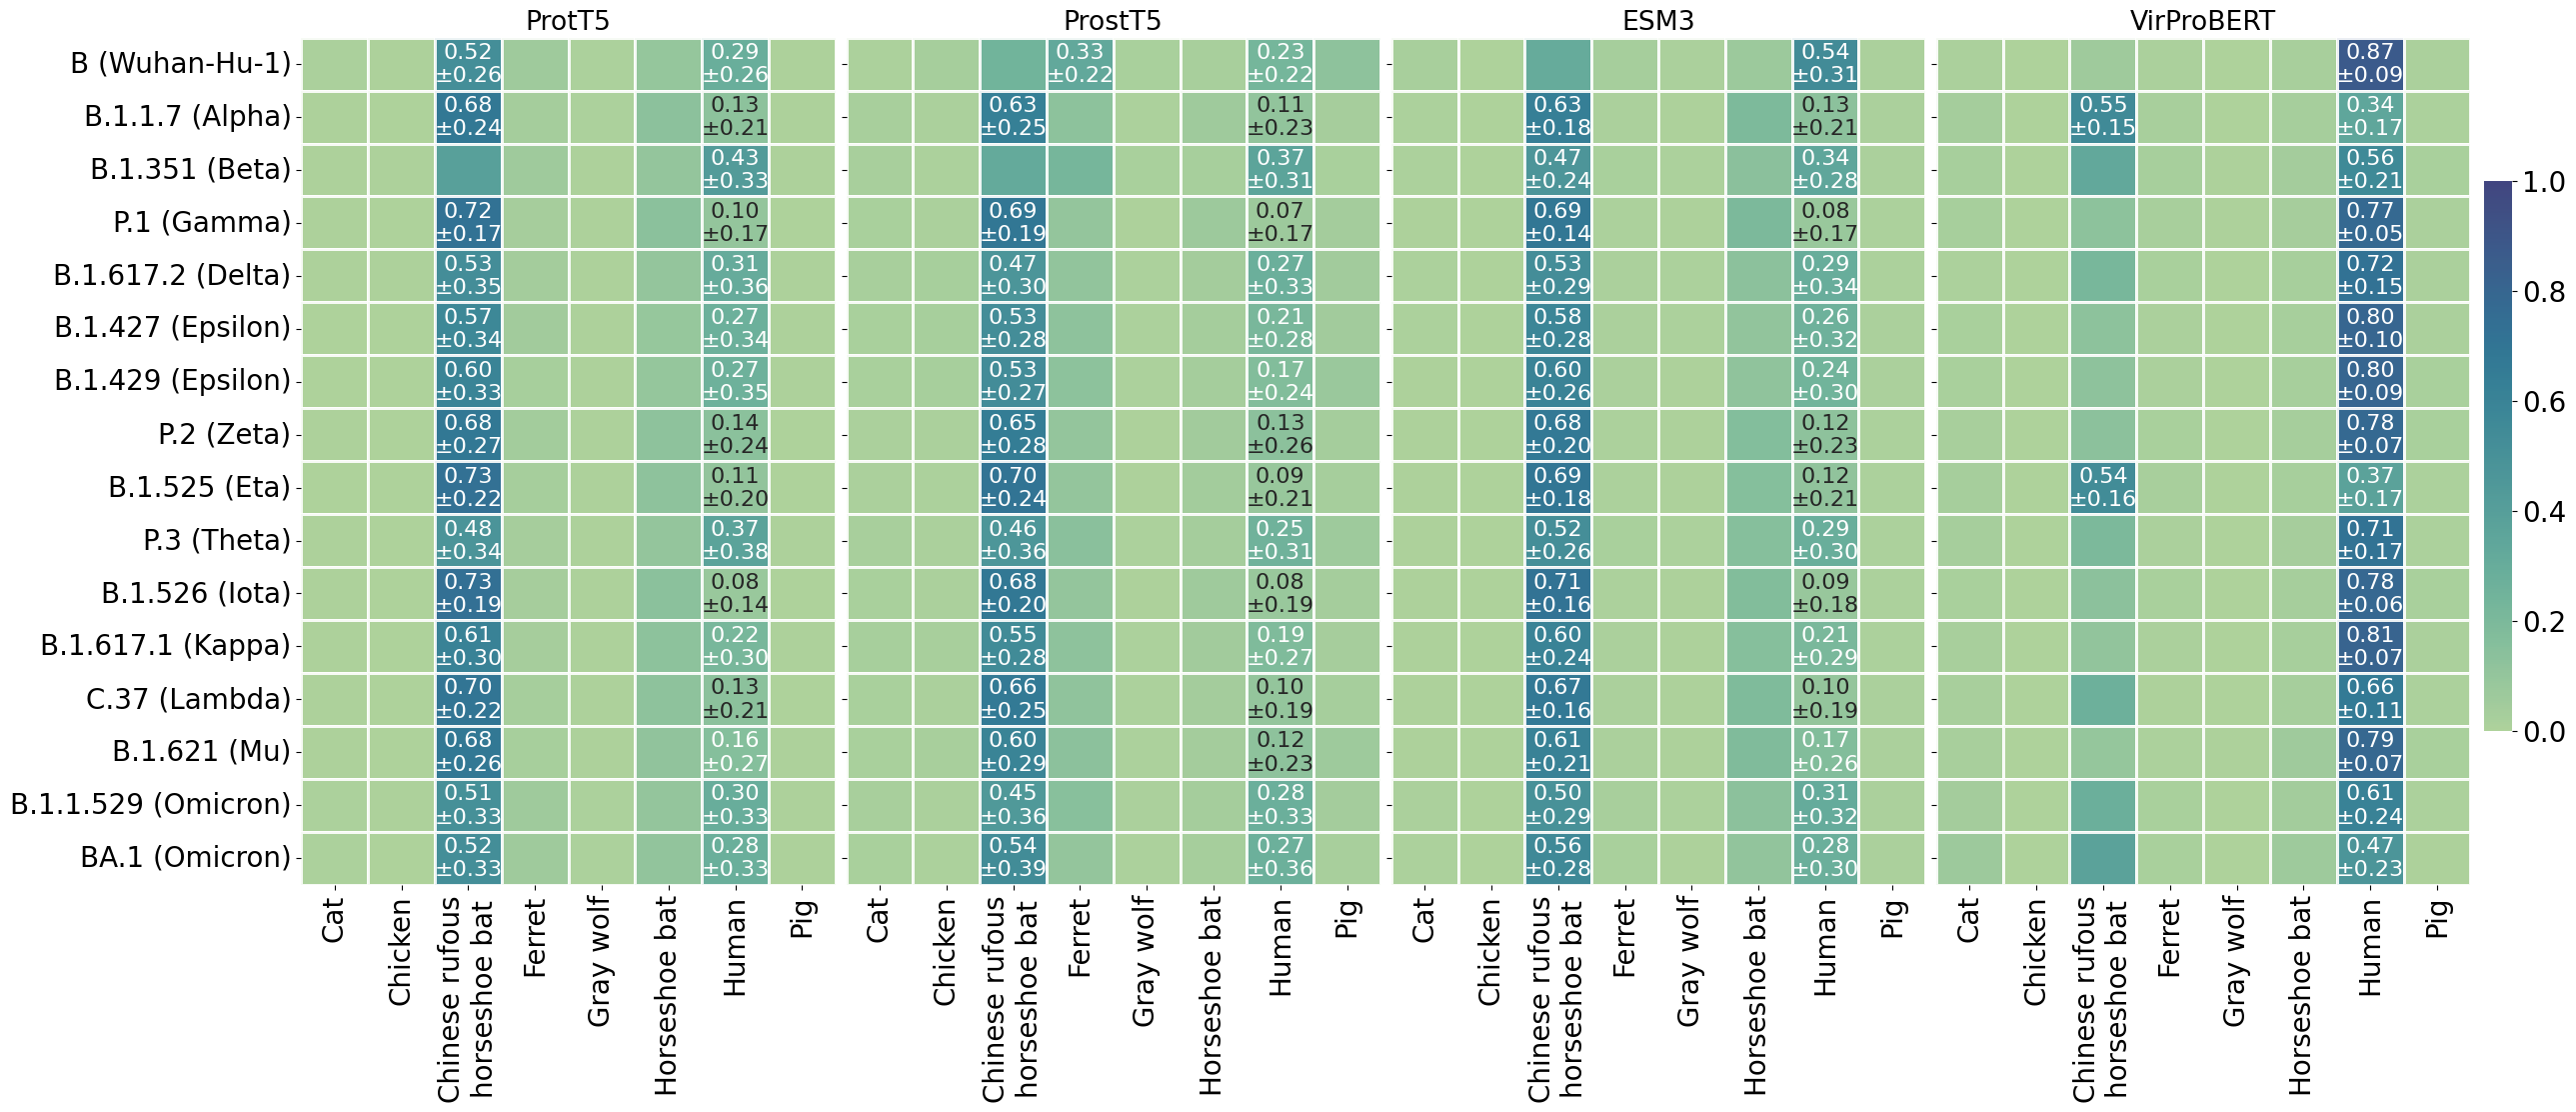

In [21]:
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams.update({'font.size': 16})
fig, axs = plt.subplots(1, 4, figsize=(28, 11), sharex=False, sharey=True)

cbar_ax = fig.add_axes([.905, .25, .01, .5])
for i, model in enumerate(models):
    model_df = df[df["model"] == model][["Cat", "Chicken", "Chinese rufous horseshoe bat", "Ferret", "Gray wolf", "Horseshoe bat", "Human", "Pig", "pango_who_annotation"]].set_index("pango_who_annotation")
    print(f"model = {model_df.shape}")
    heatmap_df = model_df.groupby("pango_who_annotation").agg("mean").reindex(variant_order)
    model_df.rename(columns={"Chinese rufous horseshoe bat": "Chinese rufous\nhorseshoe bat"}, inplace=True)
    heatmap_df.rename(columns={"Chinese rufous horseshoe bat": "Chinese rufous\nhorseshoe bat"}, inplace=True)
    sns.heatmap(heatmap_df, ax=axs[i], linewidth=2,
                annot=get_annotation_df(heatmap_df, model_df), fmt="",
                vmin=0, vmax=1,
                cbar=i == 0, 
                cbar_ax=None if i != 0 else cbar_ax,
                cmap="crest", alpha=.9)
    axs[i].set_title(model)
    axs[i].set(xlabel="", ylabel="")
plt.subplots_adjust(wspace=0.02)
plt.savefig(os.path.join(os.getcwd(), "..", "..", "..", "..", f"output/visualization/temp_new/sarscov2_variants_uniref90.pdf"), bbox_inches="tight")
plt.show()

In [19]:
df

,accession_id,Cat,Chicken,Chinese rufous horseshoe bat,Ferret,Gray wolf,Horshoe bat,Human,Pig,y_true,pangolin_lineage,geo_location,seq_length,model,Human_pred_diff,who_variant,designation,first_designation_date,location,pango_who_annotation
0,UDW43218.1,0.006330,1.050447e-02,0.006680,0.032874,0.005100,0.019163,0.909526,0.009823,Human,C.37,USA: Texas,1266.0,ProtT5,0.877108,Lambda,VOI,6/14/2021,Peru,C.37 (Lambda)
1,UJZ71565.1,0.008074,2.483119e-07,0.000002,0.911808,0.033276,0.006743,0.028032,0.012065,Human,B.1.1.529,USA,1273.0,ProtT5,-0.004386,Omicron,VOC,11/26/2021,South Africa,B.1.1.529 (Omicron)
2,UES70215.1,0.003342,1.227013e-03,0.795080,0.015439,0.004009,0.139110,0.039315,0.002477,Human,B.1.526,USA,1273.0,ProtT5,0.006897,Iota,VOI,3/24/2021,USA,B.1.526 (Iota)
3,QSE06394.1,0.003247,1.127909e-03,0.806335,0.014812,0.003732,0.130946,0.037447,0.002354,Human,P.2,USA: California,1273.0,ProtT5,0.005029,Zeta,VOI,3/17/2021,Brazil,P.2 (Zeta)
4,QTN76737.1,0.003458,1.174976e-03,0.801658,0.015148,0.003921,0.133582,0.038618,0.002440,Human,P.2,USA: New Jersey,1273.0,ProtT5,0.006200,Zeta,VOI,3/17/2021,Brazil,P.2 (Zeta)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6099,QUI11057.1,0.033002,3.407135e-03,0.076918,0.020166,0.010857,0.016620,0.824890,0.014139,Human,B.1.526,NaN,NaN,ESM3,NaN,Iota,VOI,3/24/2021,USA,B.1.526 (Iota)
6100,QVE76837.1,0.002282,6.879618e-04,0.766168,0.007731,0.002871,0.182816,0.027462,0.009982,Human,B.1.525,NaN,NaN,ESM3,NaN,Eta,VOI,3/17/2021,Nigeria,B.1.525 (Eta)
6101,QTS06228.1,0.002649,8.060397e-04,0.774727,0.008059,0.003375,0.171108,0.028715,0.010560,Human,B.1.427,NaN,NaN,ESM3,NaN,Epsilon,VOI,3/5/2021,USA,B.1.427 (Epsilon)
6102,UIT31286.1,0.008682,3.081843e-04,0.506420,0.020655,0.019005,0.082999,0.341344,0.020586,Human,P.2,NaN,NaN,ESM3,NaN,Zeta,VOI,3/17/2021,Brazil,P.2 (Zeta)


In [20]:
sub_df = df[["pango_who_annotation", "model", "Chinese rufous horseshoe bat", "Human"]]
sub_df = sub_df.set_index(["pango_who_annotation", "model"]).stack().reset_index().rename(columns={"level_2": "class", 0: "probability"})
sub_df

,pango_who_annotation,model,class,probability
0,C.37 (Lambda),ProtT5,Chinese rufous horseshoe bat,0.006680
1,C.37 (Lambda),ProtT5,Human,0.909526
2,B.1.1.529 (Omicron),ProtT5,Chinese rufous horseshoe bat,0.000002
3,B.1.1.529 (Omicron),ProtT5,Human,0.028032
4,B.1.526 (Iota),ProtT5,Chinese rufous horseshoe bat,0.795080
...,...,...,...,...
12203,B.1.427 (Epsilon),ESM3,Human,0.028715
12204,P.2 (Zeta),ESM3,Chinese rufous horseshoe bat,0.506420
12205,P.2 (Zeta),ESM3,Human,0.341344
12206,BA.1 (Omicron),ESM3,Chinese rufous horseshoe bat,0.770325


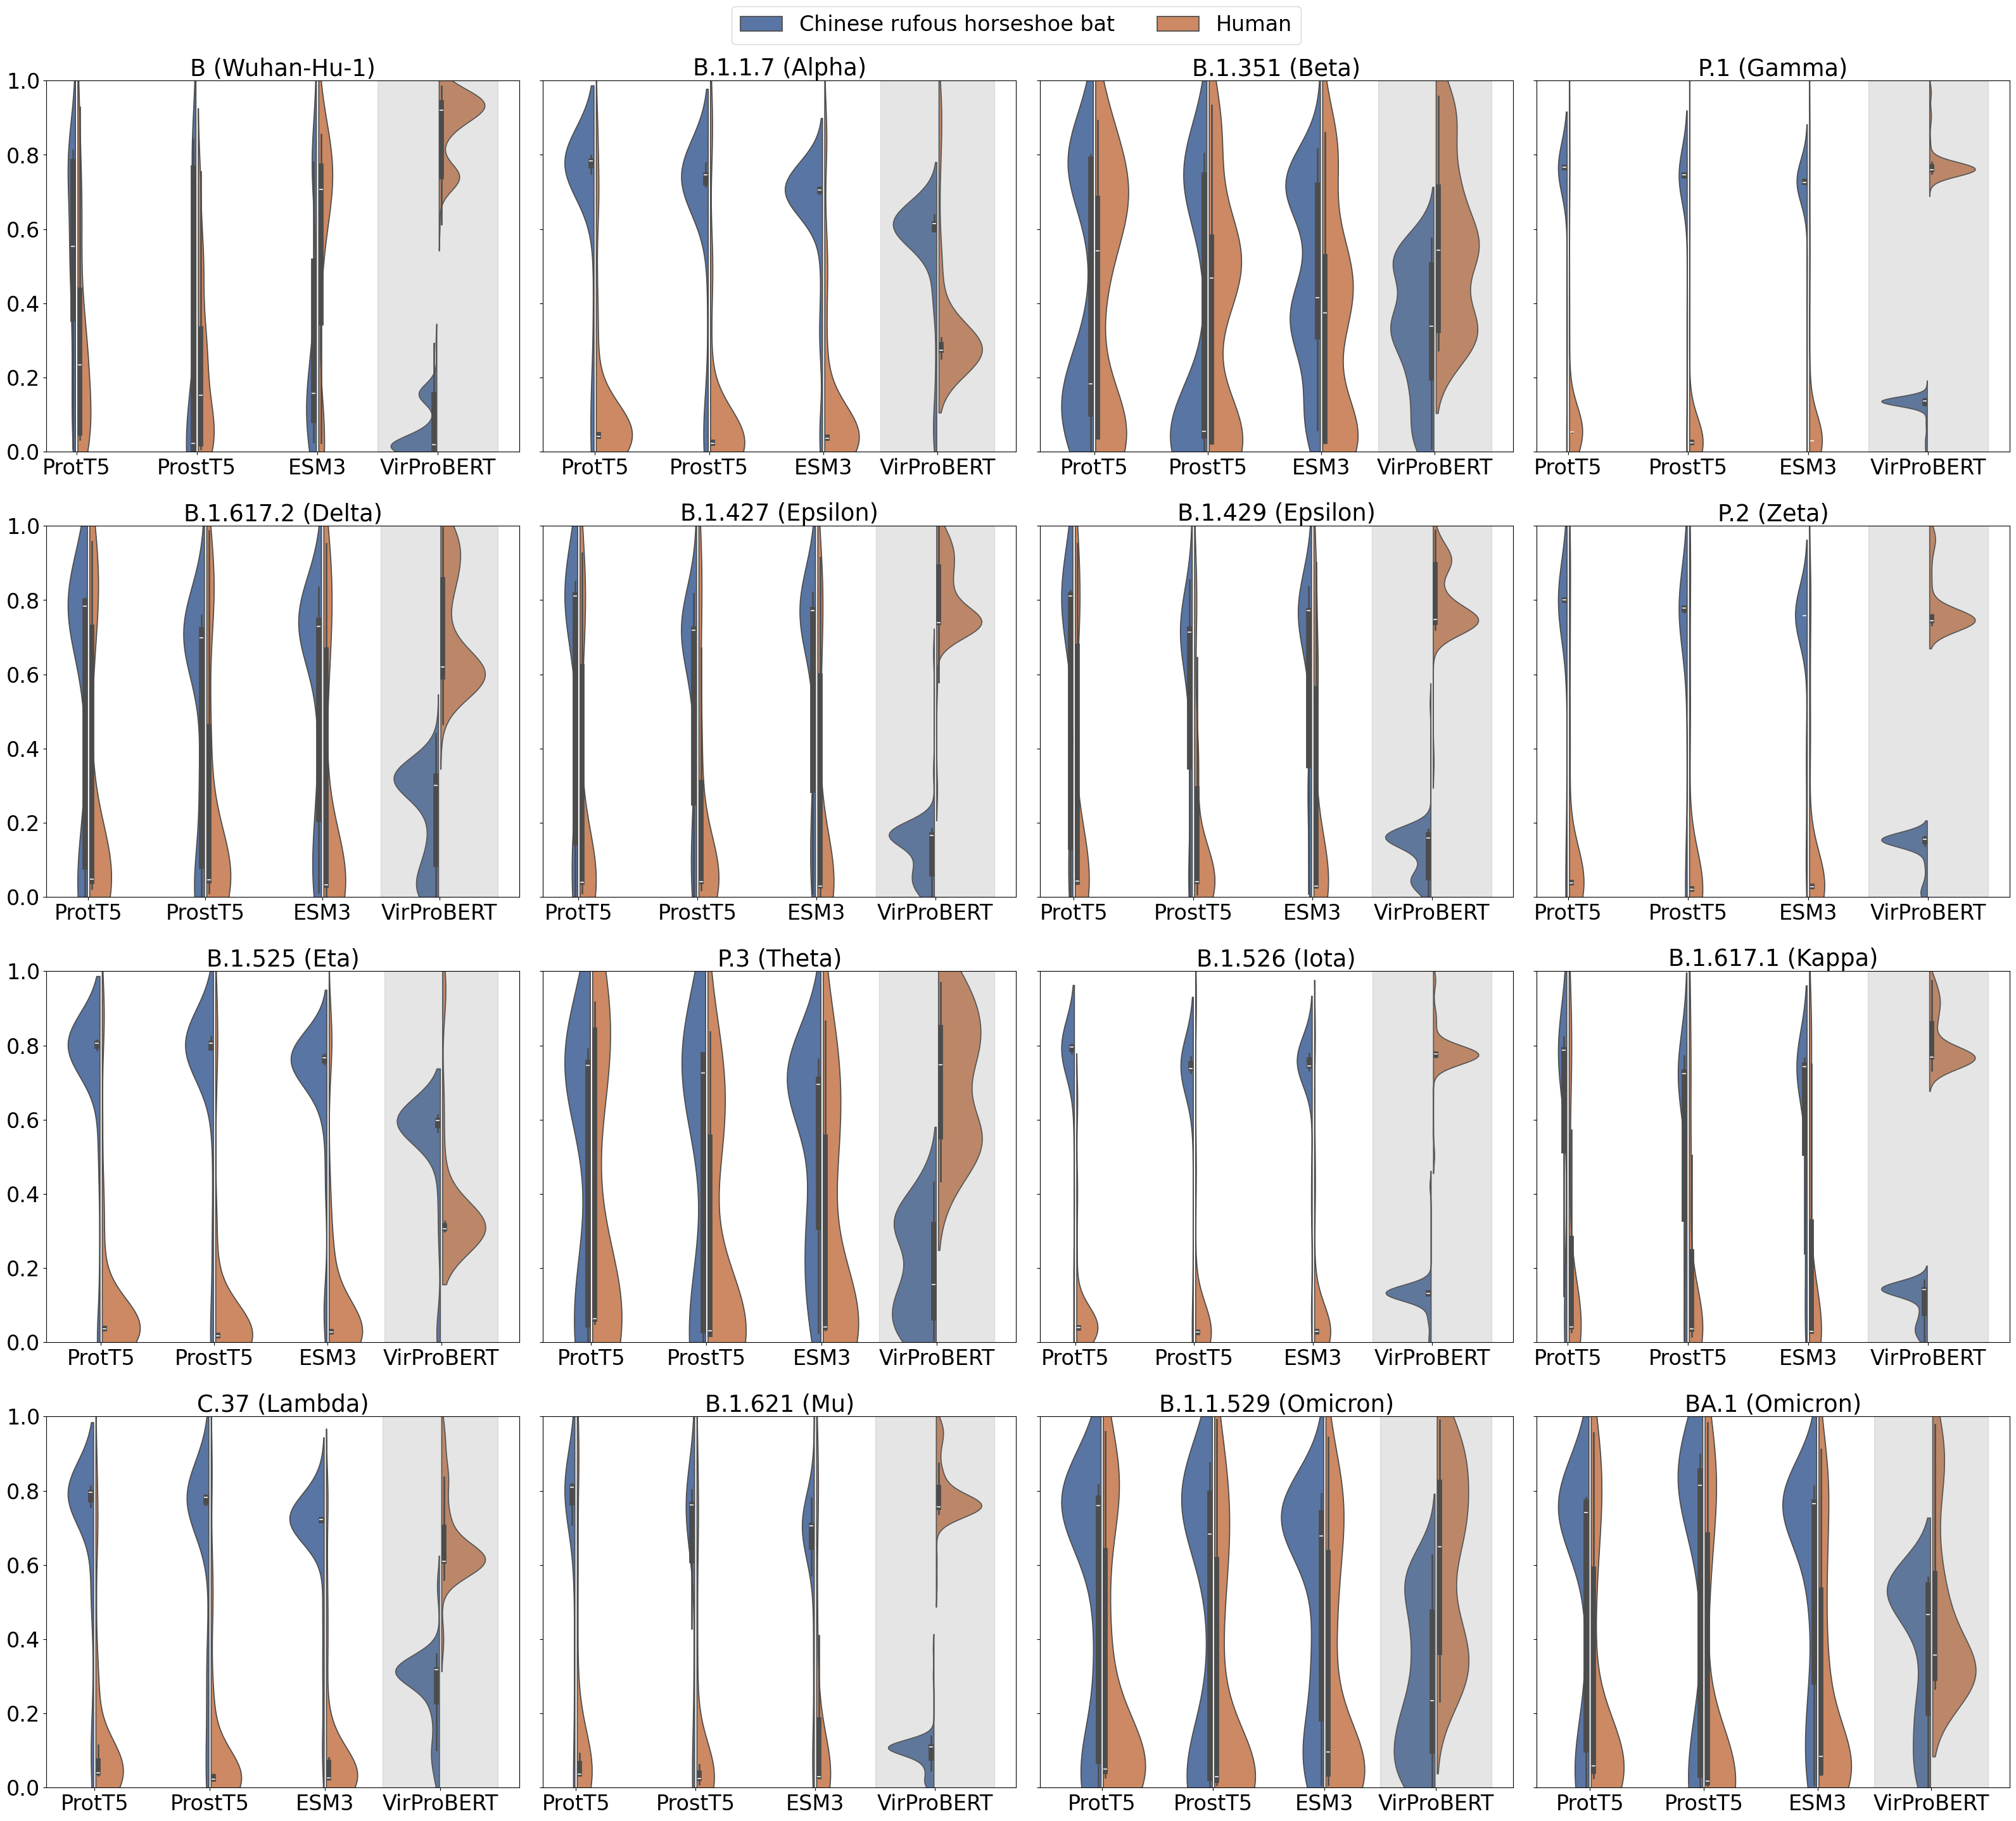

In [21]:
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(4, 4, figsize=(40, 35), sharex=False, sharey=True)

i = 0
legend_ax = None
virprobert_index = len(models) - 1
for ax_row in axs:
    for ax in ax_row:
        if i == 1:
            legend_ax = ax
        variant = variant_order[i]
        plot_df = sub_df[sub_df["pango_who_annotation"] == variant][["model", "class", "probability"]]
        sns.violinplot(plot_df, x="model", y="probability", hue="class", ax=ax, 
                       split=True, gap=.05, fill=True, palette="deep", order=models,
                      legend=False if i != 1 else True)
        ax.set_title(variant)
        ax.set(xlabel="", ylabel="")
        i += 1
        ax.axvspan(virprobert_index - .5, virprobert_index + .5, color="gray", alpha=0.2)
        ax.set_ylim(0, 1)

for ax in axs.flat:
    ## check if something was plotted 
    if not bool(ax.has_data()):
        fig.delaxes(ax) ## delete if nothing is plotted in the axes obj
        
sns.move_legend(
    legend_ax, "lower center",
    bbox_to_anchor=(1, 1.07), ncol=2, title=None, frameon=True, fontsize=24
)
plt.subplots_adjust(wspace=0.05)
plt.savefig(os.path.join(os.getcwd(), "..", "..", "..", "..", f"output/visualization/temp_new/sarscov2_variants_uniref90_crhb_human_violinplot.pdf"), bbox_inches="tight")
plt.show()